# Packages

In [236]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import re
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [112]:
# Load CSV files
file_path = '/content/drive/MyDrive/Colab Notebooks/Springboard - relax_challenge/'
takehome_users_csv = os.path.join(file_path, "takehome_users.csv")
takehome_user_engagement_csv = os.path.join(file_path, "takehome_user_engagement.csv")

users_df = pd.read_csv(takehome_users_csv, encoding="ISO-8859-1")
engagement_df = pd.read_csv(takehome_user_engagement_csv)

In [6]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [91]:
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


# Defining Adopted User

In [115]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [116]:
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [117]:
engagement_df['time_stamp'] = pd.to_datetime(engagement_df['time_stamp'])

In [118]:
engagement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [125]:
tmp_df = engagement_df.copy()

# Select only the Date part of time stmap, convert to unix times
tmp_df['time_stamp'] = tmp_df['time_stamp'].dt.floor('d').astype(np.int64)

# Sort and remove duplicated days per users
tmp_df = tmp_df.sort_values(['user_id', 'time_stamp']).drop_duplicates()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [148]:
# Rolling window of 3 lines within each user_id of the time_stamps
roll_window = tmp_df.groupby('user_id')['time_stamp'].rolling(window=3)

# Calculate the difference in days between the max and min of the rolling window
deltaDays = pd.to_timedelta((roll_window.max() - roll_window.min())).dt.days

# Create a list of only the user_id that logged in 3 times within a 7 day period.
adopted_user_list = sorted(list(set(deltaDays[deltaDays <= 7].index.get_level_values('user_id'))))

print(adopted_user_list[:10])

[2, 10, 20, 33, 42, 43, 50, 53, 60, 63]


In [187]:
users_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,Not Adopted
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,Not Adopted
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,Not Adopted
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,Not Adopted
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,Not Adopted
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,Not Adopted
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,Not Adopted
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,Not Adopted
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,Not Adopted


In [202]:
# Add target label to users_df
users_df["adopted_user"] = ["Adopted" if user in adopted_user_list else "Not Adopted" for user in users_df.object_id]

# EDA

In [203]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  adopted_user                12000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 1.0+ MB


In [219]:
# Convert to unix timestamp, similar to last_session_creation_time
users_df["creation_time"] = pd.to_datetime(users_df["creation_time"])
users_df["creation_time"] = users_df["creation_time"].dt.floor('d').astype(np.int64)
users_df["creation_time"].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


dtype('int64')

In [204]:
# Count the missing data
missing_data = pd.concat([users_df.isnull().sum(), 100 * users_df.isnull().mean()], axis=1)
missing_data.columns=['count', '%']
missing_data.sort_values(by="count", ascending=False)

,count,%
invited_by_user_id,5583,46.525
last_session_creation_time,3177,26.475
object_id,0,0.000
creation_time,0,0.000
name,0,0.000
email,0,0.000
creation_source,0,0.000
opted_in_to_mailing_list,0,0.000
enabled_for_marketing_drip,0,0.000
org_id,0,0.000


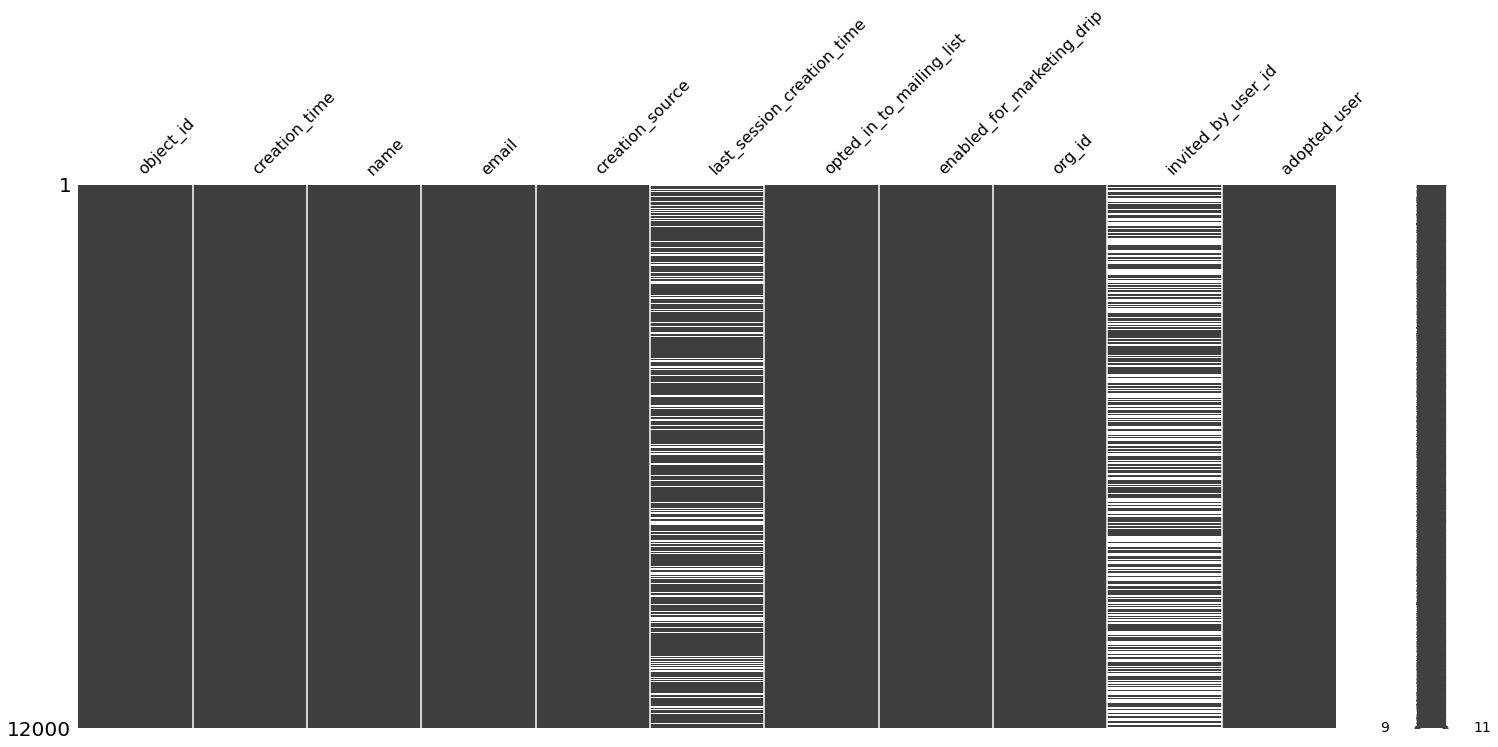

In [205]:
msno.matrix(users_df)
plt.show()

In [220]:
# Examining the values
def uniqueChecker(col):
    return users_df[col].unique()

for col in users_df.columns:
    print(col, uniqueChecker(col))

object_id [    1     2     3 ... 11998 11999 12000]
creation_time [1398124800000000000 1384473600000000000 1363651200000000000
 1369094400000000000 1358380800000000000 1387238400000000000
 1355616000000000000 1375228800000000000 1383609600000000000
 1358294400000000000 1388016000000000000 1397692800000000000
 1396137600000000000 1349913600000000000 1373932800000000000
 1360540800000000000 1397001600000000000 1377302400000000000
 1369353600000000000 1394064000000000000 1358812800000000000
 1391990400000000000 1345161600000000000 1378684800000000000
 1393286400000000000 1374969600000000000 1389657600000000000
 1379289600000000000 1370304000000000000 1390435200000000000
 1366156800000000000 1394496000000000000 1391385600000000000
 1375315200000000000 1375747200000000000 1348531200000000000
 1400976000000000000 1378771200000000000 1401062400000000000
 1398816000000000000 1352592000000000000 1356912000000000000
 1401235200000000000 1398729600000000000 1388534400000000000
 133902720000000000

In [221]:
# Ensure all missing values are marked as nan
users_df.fillna(value=np.nan, inplace=True)

In [231]:
# Split Data into Numerical and Catagorical
catData = users_df.select_dtypes('object')

numCols = set(users_df.columns) - set(catData.columns)
numData = users_df[numCols]

In [229]:
catData

,name,email,creation_source,adopted_user
0,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,Not Adopted
1,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,Adopted
2,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,Not Adopted
3,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,Not Adopted
4,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,Not Adopted
...,...,...,...,...
11995,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,Not Adopted
11996,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,Not Adopted
11997,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,Not Adopted
11998,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,Not Adopted


In [232]:
numData

,object_id,last_session_creation_time,creation_time,opted_in_to_mailing_list,org_id,invited_by_user_id,enabled_for_marketing_drip
0,1,1.398139e+09,1398124800000000000,1,11,10803.0,0
1,2,1.396238e+09,1384473600000000000,0,1,316.0,0
2,3,1.363735e+09,1363651200000000000,0,94,1525.0,0
3,4,1.369210e+09,1369094400000000000,0,1,5151.0,0
4,5,1.358850e+09,1358380800000000000,0,193,5240.0,0
...,...,...,...,...,...,...,...
11995,11996,1.378448e+09,1378425600000000000,0,89,8263.0,0
11996,11997,1.358275e+09,1357776000000000000,0,200,NaN,0
11997,11998,1.398603e+09,1398556800000000000,1,83,8074.0,1
11998,11999,1.338638e+09,1338422400000000000,0,6,NaN,0


## Numerical Data EDA

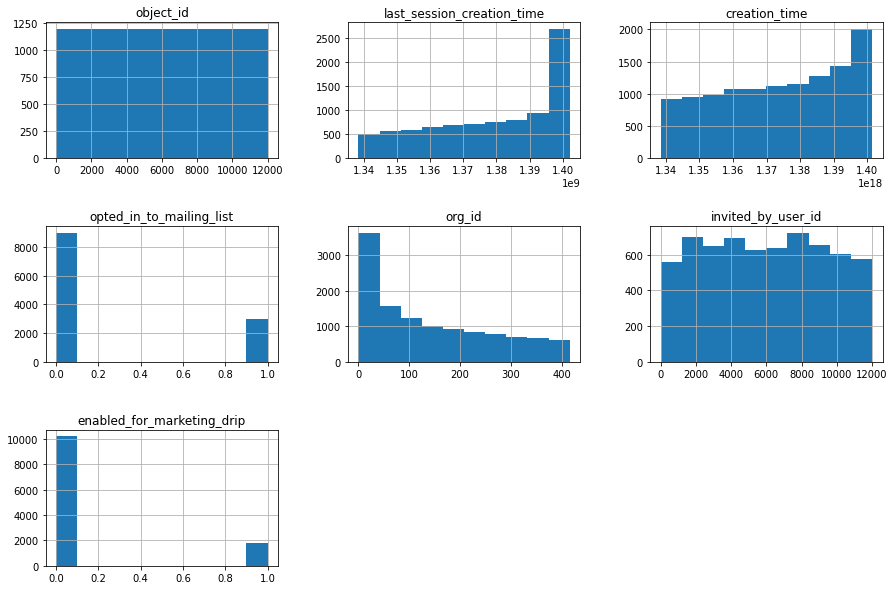

In [234]:
# Plot the numerical data
numData.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);
plt.show()

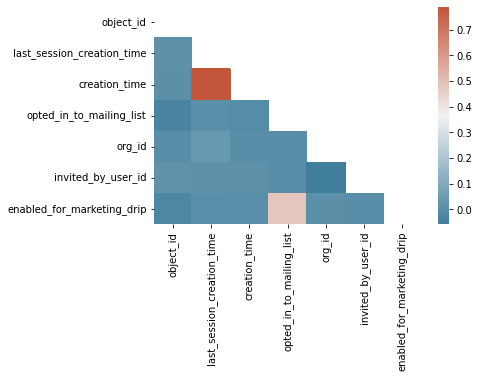

In [241]:
# Heatmap
mask = np.triu(np.ones_like(numData.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(numData.corr(), mask=mask, cmap=cmap)
plt.show()

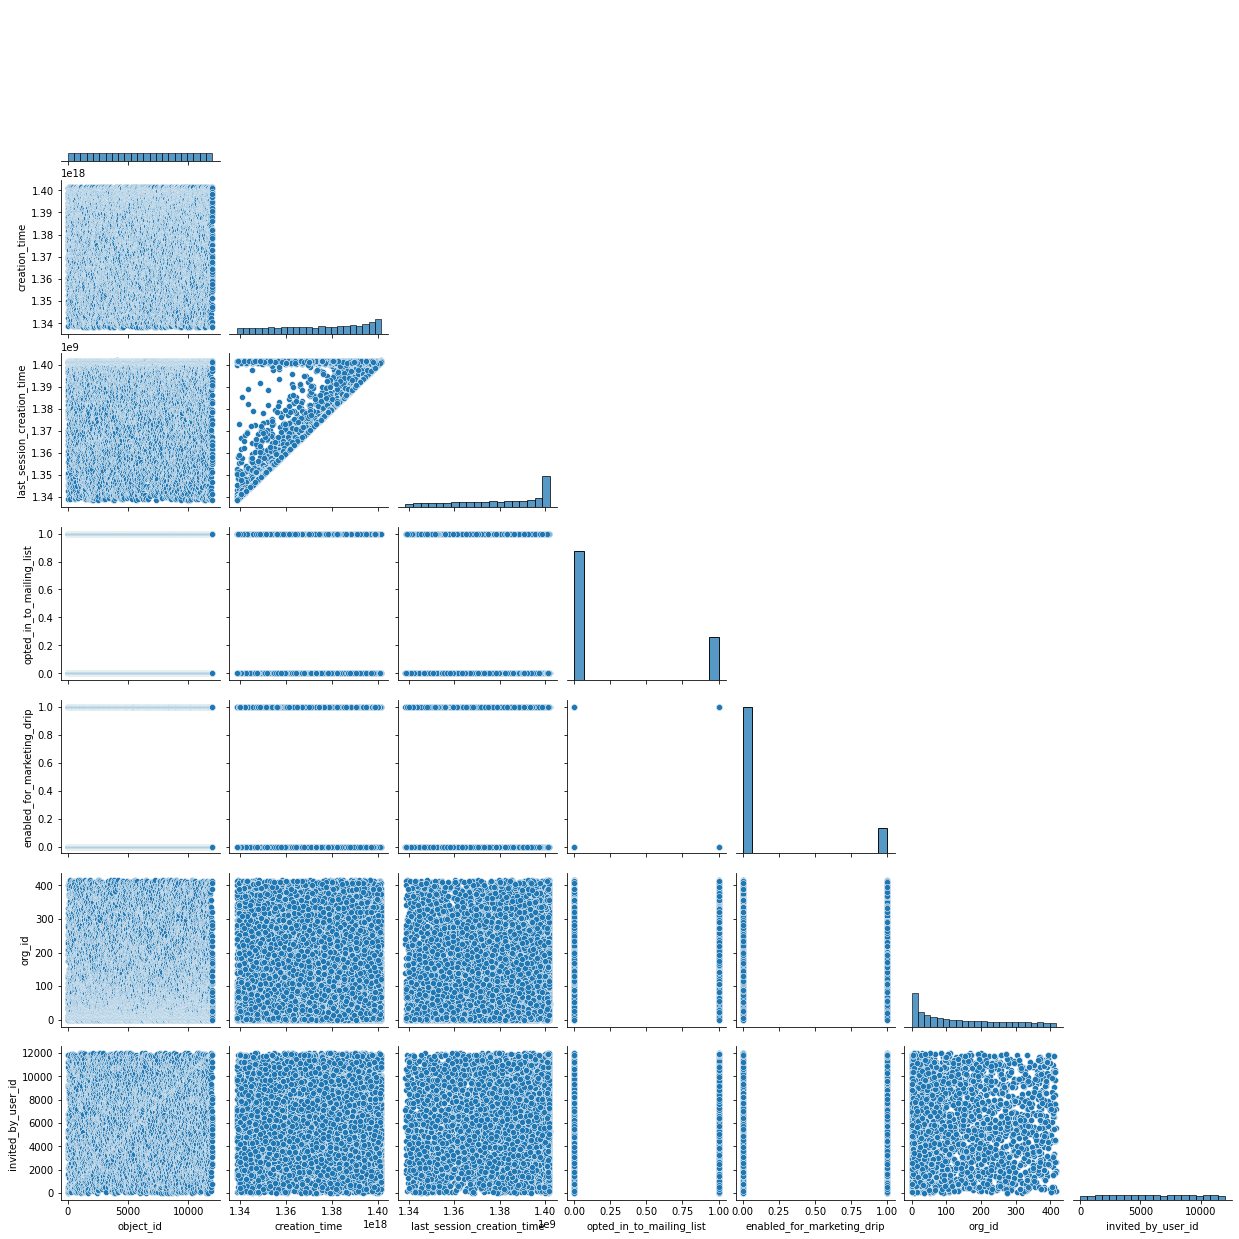

In [242]:
sns.pairplot(users_df, corner=True)
plt.show()

object_id column is not needed for modeling step since its just an identifier, so it can be dropped from the dataframe.

## Catagorical Data EDA

In [252]:
list(set(users_df.name))[:20]

['Herrmann Barbara',
 'Baum Dieter',
 'Hartnett Noah',
 'Paniagua Frank',
 'Eggers Joel',
 'Lineberry Mark',
 'Souza Evelyn',
 'Law Dominic',
 'Egger Luca',
 'Jespersen Lasse',
 'Lauridsen Helena',
 'Bertelsen Morten',
 'Malkin Arthur',
 'Brandt Aksel',
 'Nevile Jasper',
 'Bryan Mia',
 'Elledge Celina',
 'Eberhart Jonas',
 'Selleck Gabriel',
 'Moore Larry']

In [254]:
emailName = [re.split("@", email) for email in users_df.email]
emailType = [item[1] for item in emailName]
list(set(emailType))[:20]

['itsly.com',
 'fqoyz.com',
 'goffm.com',
 'ghtwe.com',
 'xituv.com',
 'yyywm.com',
 'erayt.com',
 'xuifc.com',
 'rnlqw.com',
 'wqpco.com',
 'fboqn.com',
 'nwukn.com',
 'ouigi.com',
 'nwybj.com',
 'ewybl.com',
 'rilif.com',
 'ppecw.com',
 'ripze.com',
 'cnkin.com',
 'ckvbo.com']

Both email and name are user specific and do not provide meaningful information. I thought the email may be dividied into different email types like gmail, yahoo, etc. But for this case, it looks like example data contains randomly generated emails for users. These 2 columns can be dropped going forward.

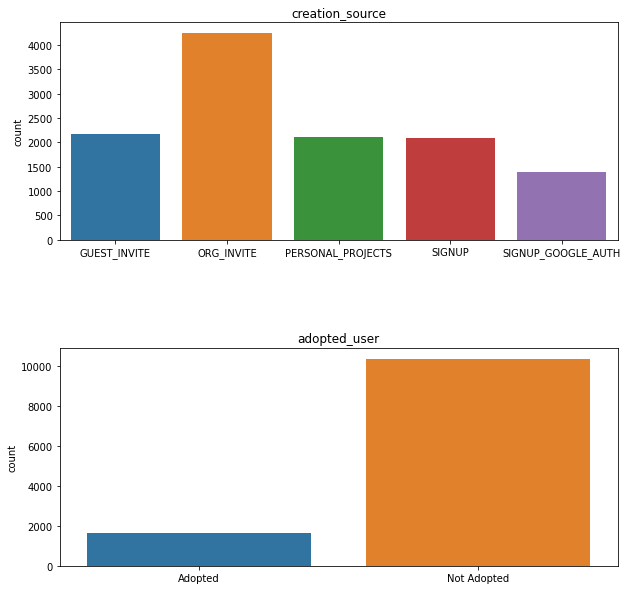

In [261]:
# Plot the catagorical data
cols = catData.columns.drop(["name", "email"])
cols.sort_values()
fig, ax = plt.subplots(len(cols), figsize = (10,10))

for i, col in enumerate(cols):
    sns.countplot(x=col,
                  data=catData.sort_values(by=col),
                  ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel(None)
    
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [267]:
# Drop uncessary columns
users_df.drop(["object_id", "name", "email"], axis=1, inplace=True)
users_df.head()

,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1398124800000000000,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,Not Adopted
1,1384473600000000000,ORG_INVITE,1.396238e+09,0,0,1,316.0,Adopted
2,1363651200000000000,ORG_INVITE,1.363735e+09,0,0,94,1525.0,Not Adopted
3,1369094400000000000,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,Not Adopted
4,1358380800000000000,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,Not Adopted


In [276]:
# New split data into Numerical and Catagorical
New_catData = users_df.select_dtypes('object')

New_numCols = set(users_df.columns) - set(New_catData.columns)
New_numData = users_df[New_numCols]

## Adopted Users EDA

Adopted? | Count
Adopted         1656
Not Adopted    10344
Name: adopted_user, dtype: int64


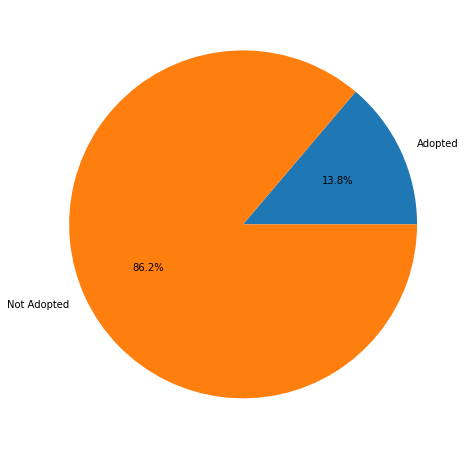

In [268]:
# Class Distribution
groups = users_df.adopted_user.value_counts().sort_index()
print("Adopted? |", "Count")
print(groups)

plt.figure(figsize=(8,8))
mylab = groups.index

plt.pie(groups, labels=mylab, autopct='%1.1f%%')
plt.show()

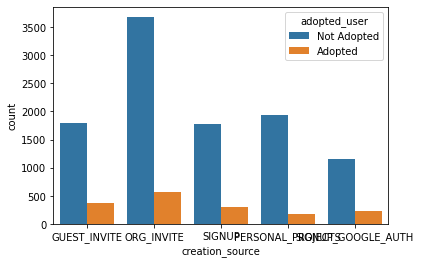

In [282]:
sns.countplot(x=New_catData.creation_source,
              data=New_catData,
              hue=New_catData["adopted_user"])

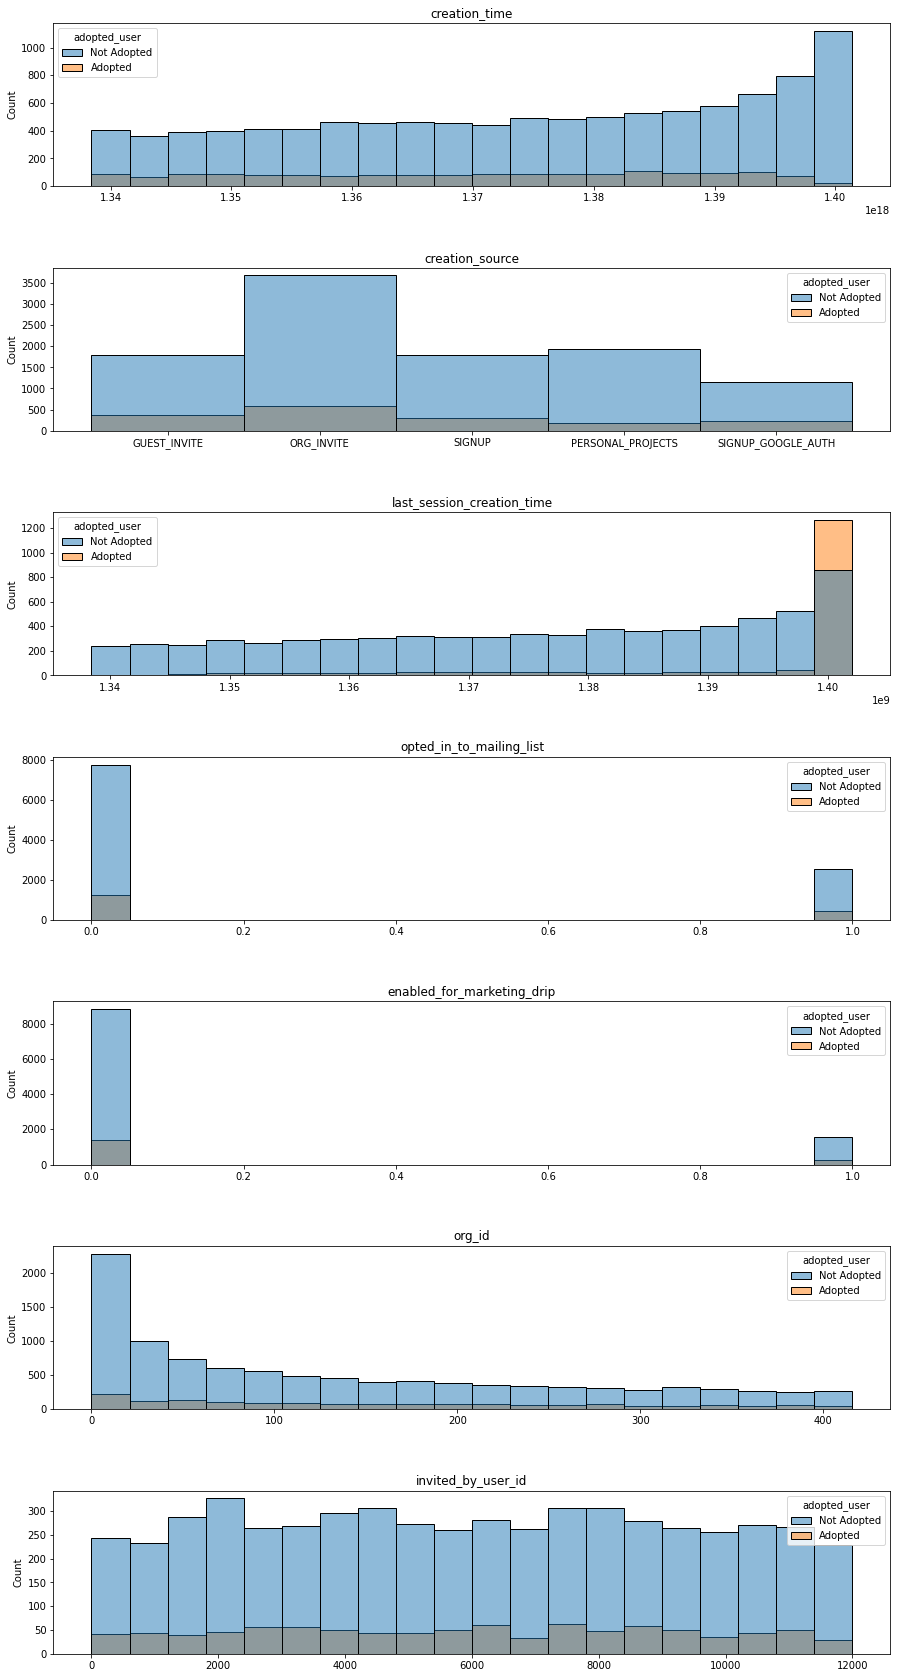

In [286]:
cols = users_df.drop(["adopted_user"],axis=1).columns

fig, ax = plt.subplots(len(cols), figsize = (15,30))

for i, col in enumerate(cols):
  sns.histplot(x=col,
               data=users_df,
               hue="adopted_user",
               ax=ax[i],
               element="bars",
               bins=20)
  ax[i].set_title(col)
  ax[i].set_xlabel(None)

plt.subplots_adjust(hspace = 0.5)
plt.show()

# Modeling

Modeling goal is to identify which factors predict future user adoptions.

## Modeling Packages

In [288]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, learning_curve
from sklearn.utils.class_weight import compute_sample_weight
import joblib
import xgboost as xgb

In [287]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_time               12000 non-null  int64  
 1   creation_source             12000 non-null  object 
 2   last_session_creation_time  8823 non-null   float64
 3   opted_in_to_mailing_list    12000 non-null  int64  
 4   enabled_for_marketing_drip  12000 non-null  int64  
 5   org_id                      12000 non-null  int64  
 6   invited_by_user_id          6417 non-null   float64
 7   adopted_user                12000 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 750.1+ KB


In [290]:
# Split the data into feature X and target y
X = users_df.drop(columns="adopted_user", axis=1)
y = users_df.adopted_user

# Label encode target y
le = LabelEncoder()
le.fit(y)
le.classes_ = np.array(["Not Adopted", "Adopted"])
encoded_y = le.transform(y)

# Train Test Split by 30%
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, test_size = 0.3, random_state=123)

In [295]:
# Grouped numerical columns
num_cols = users_df.select_dtypes(['float64', "int64"]).columns

# Grouped categorical columns
cat_cols = users_df.select_dtypes('object').drop(columns="adopted_user").columns

# Preprocessing for numerical data
num_preprocessor = SimpleImputer(strategy='constant', fill_value=-99)

# Preprocessing for categorical data
cat_preprocessor = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value="-99")),
                                   ('oe', OrdinalEncoder())])

# Combine num and cat preprocessor for data frame transformation
preprocessor = ColumnTransformer(
    transformers=[('num_transformer', num_preprocessor, num_cols),
                  ('cat_transformer', cat_preprocessor, cat_cols)])

Will be modeling using a tree-based approach to retrieve feature importance. Will be using f1_weighted as the metric due to the heavy class imbalance.

## Baseline XGB Model

In [306]:
# Baseline Model
pipe_initial = Pipeline(steps=[('preprocessor', preprocessor),
                               ('xgb_model', xgb.XGBClassifier(random_state=123))])

pipe_initial.fit(X_train, y_train)

pred_tr = pipe_initial.predict(X_train)

print(classification_report(y_train, pred_tr))

scores = cross_val_score(pipe_initial, X_train, y_train, cv=30, scoring="f1_weighted", n_jobs=-1)
print("Scores:", scores * 100)
print("Mean:", scores.mean() * 100)
print("Standard Deviation:", scores.std())

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7279
           1       0.97      0.84      0.90      1121

    accuracy                           0.97      8400
   macro avg       0.97      0.92      0.94      8400
weighted avg       0.97      0.97      0.97      8400

Scores: [97.42214941 98.92233291 94.47603446 95.55134249 97.42214941 97.80466472
 96.64062331 93.98566346 95.48924759 98.5545147  96.64062331 94.04206116
 98.9092222  97.38715146 98.18203701 96.64062331 97.0728863  96.68562068
 97.45485181 97.07520167 95.15473133 98.90985586 95.15473133 97.77842566
 97.42475302 95.84342847 97.42475302 97.03790087 96.34400208 97.03790087]
Mean: 96.81564946296815
Standard Deviation: 0.013388407844353474


## Model Hyperparameter Tuning

In [307]:
def rand_search_eval(input_X, input_y, estimator, hype_params):
    
    """
    Function performs RandomizedSearchCV on inputted hyper parameters.
    After models are created, the mean score and standard deviation of each iteration is stored.
    The model is graphed against f1_weighted score.
    The top 5 models are listed with their scores and iteration number for identification
    Best parameters and best score are printed too.
    """
    
    # Random Search with CV of the hyper parameters
    rand_search = RandomizedSearchCV(
        n_jobs=-1,
        estimator=estimator,
        param_distributions=hype_params,
        scoring = 'f1_weighted',
        n_iter = 200,
        cv = 5,
        verbose=10,
        random_state=123
    )
    
    # Fit and CV models with hyper parameters
    rand_search.fit(input_X, input_y)
    
    # Mean and Standard Deviation from iteration
    mean_score = list(rand_search.cv_results_['mean_test_score'])
    stds_score = list(rand_search.cv_results_['std_test_score'])
    
    # Graphs each iteration and its f1_weighted score
    plt.subplots(figsize=(10, 5))
    plt.errorbar(list(range(0,len(mean_score))), mean_score, yerr=stds_score)
    plt.title("Rand_Search Iteration vs f1_weighted Score")
    plt.xlabel("Iteration")
    plt.ylabel("f1_weighted score")
    plt.show()
    
    # Prints the top 5 scores with iteration number
    print(sorted(list(enumerate(mean_score)), key=lambda x: x[1], reverse=True)[0:5])
    
    print("Best Parameters: ", rand_search.best_params_)
    print("Best Score: ", rand_search.best_score_)
    
    return(rand_search)

In [308]:
pipe_tuning = Pipeline(steps=[('preprocessor', preprocessor),
                              ('xgb_model', xgb.XGBClassifier(random_state=123))])

In [309]:
# Set Hyper Parameters Ranges
hype_params = {
    'xgb_model__learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
    'xgb_model__n_estimators': range(20, 620, 20),
    'xgb_model__max_depth': range(1, 21),
    'xgb_model__min_child_weight': range(1,21),
    'xgb_model__gamma': range(0, 45, 5),
    'xgb_model__subsample': [i/10 for i in range(0, 11)],
    'xgb_model__colsample_bytree': [i/10 for i in range(0, 11)],
    'xgb_model__reg_lambda': [0, 0.001, 0.1, 0.5, 1, 3, 5, 10, 100]
}

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


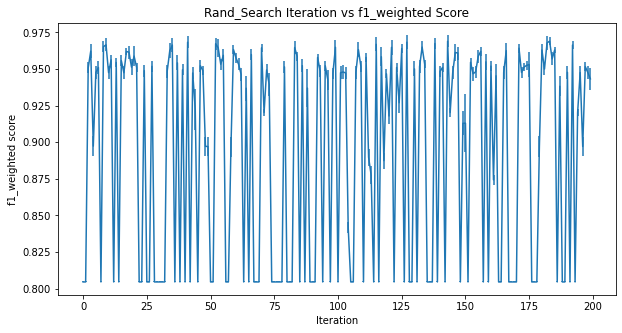

[(183, 0.9689993098764171), (143, 0.968972527707205), (127, 0.968307163275119), (41, 0.9682931078272892), (182, 0.9678288862908129)]
Best Parameters:  {'xgb_model__subsample': 1.0, 'xgb_model__reg_lambda': 0.5, 'xgb_model__n_estimators': 360, 'xgb_model__min_child_weight': 12, 'xgb_model__max_depth': 9, 'xgb_model__learning_rate': 1, 'xgb_model__gamma': 5, 'xgb_model__colsample_bytree': 0.5}
Best Score:  0.9689993098764171


In [310]:
rand_search = rand_search_eval(X_train, y_train, pipe_tuning, hype_params)

In [311]:
rand_search.best_params_

{'xgb_model__colsample_bytree': 0.5,
 'xgb_model__gamma': 5,
 'xgb_model__learning_rate': 1,
 'xgb_model__max_depth': 9,
 'xgb_model__min_child_weight': 12,
 'xgb_model__n_estimators': 360,
 'xgb_model__reg_lambda': 0.5,
 'xgb_model__subsample': 1.0}

In [312]:
rand_search.best_score_

0.9689993098764171

In [313]:
final_model = rand_search

# Cross Validation Score
scores = cross_val_score(final_model.best_estimator_, X_test, y_test, cv=5, scoring="f1_weighted", n_jobs=-1)
print("Scores:", scores * 100)
print("Mean:", scores.mean() * 100)
print("Standard Deviation:", scores.std())

Scores: [96.5377212  96.70446759 97.5641717  96.09592215 97.73230112]
Mean: 96.9269167501368
Standard Deviation: 0.0062389849813570975


In [314]:
pred_te = final_model.predict(X_test)

print(classification_report(y_test, pred_te))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3065
           1       0.94      0.89      0.91       535

    accuracy                           0.98      3600
   macro avg       0.96      0.94      0.95      3600
weighted avg       0.97      0.98      0.98      3600



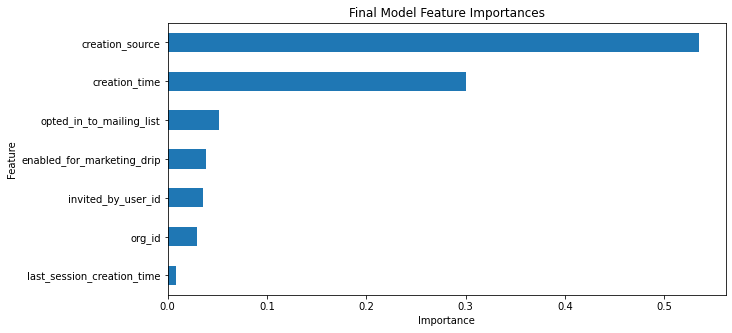

In [315]:
plt.subplots(figsize=(10, 5))
imps_features = final_model.best_estimator_.named_steps.xgb_model.feature_importances_
col_names = [col for col in X_train.columns]
final_model_imps = pd.Series(imps_features, index=col_names).sort_values(ascending=True)
final_model_imps.plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Final Model Feature Importances');
plt.show()

My model has identified that creation_source and creation_time are the two features that have the highest impact in predicting future user adoption.